In [1567]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
import sklearn.metrics as metrics

In [1568]:
#import and read data
df = pd.read_csv("medical_clean212.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [1569]:
#visualize columns for analysis - only continous variables allow for kmeans algorithm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [1570]:
#initialize new df for analysis -- choose features relevant to analyst question
df = df[['Population','Initial_days']]
df

,Population,Initial_days
0,2951,10.585770
1,11303,15.129562
2,17125,4.772177
3,2162,1.714879
4,5287,1.254807
...,...,...
9995,4762,51.561220
9996,1251,68.668240
9997,532,70.154180
9998,271,63.356900


In [1571]:
#view data to make sure ranges are same (important in Kmeans)
df.describe()

,Population,Initial_days
count,10000.000000,10000.000000
mean,9965.253800,34.455299
std,14824.758614,26.309341
min,0.000000,1.001981
25%,694.750000,7.896215
50%,2769.000000,35.836244
75%,13945.000000,61.161020
max,122814.000000,71.981490


In [1572]:
#Begin preprocessing step --- standardize data to make sure all is scaled accordingly 
#scaled since different units of measure
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
pd.DataFrame(X_scaled).describe()

,0,1
count,1.000000e+04,1.000000e+04
mean,-1.207923e-17,-1.818989e-16
std,1.000050e+00,1.000050e+00
min,-6.722371e-01,-1.271601e+00
25%,-6.253705e-01,-1.009543e+00
50%,-4.854456e-01,5.249140e-02
75%,2.684661e-01,1.015117e+00
max,7.612562e+00,1.426416e+00


In [1573]:
#Change data to df and for csv export
df_scaled = pd.DataFrame(X_scaled, columns = ['Population','Initial_days'])

In [1574]:
#export cleaned and scaled data for task 
df_scaled.to_csv('Scaled_dataD212PT1')

In [1575]:
#start clustering analysis with kmeans, begin with random k cluster 
#k-means+++ to initalize centroids randomly, n_init 10 run algorithm 10 times, same random state everytime 
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans = kmeans.fit(X_scaled)

In [1576]:
#Use silhouette score to quantify the quality of the clustering analysis 
#[-1,1] anything that is closer to -1 is not fit well 
silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')

0.627102500347541

In [1577]:
#Begin elbow method to review other clusters for optimal analysis
#within cluster sum of squares -- this is how far each of the data points are from their assigned cluster points  
K = range(1,12)
WSS = []
for k in K:
    kmeans=KMeans(n_clusters=k,init="k-means++", n_init=10, random_state=42)
    kmeans=kmeans.fit(X_scaled)
    wss_iter = kmeans.inertia_
    WSS.append(wss_iter)

<Axes: xlabel='Clusters', ylabel='WSS'>

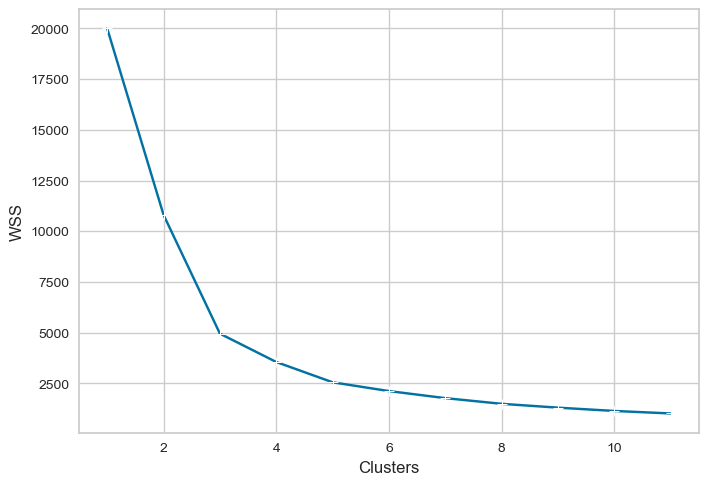

In [1578]:
#plot Elbow method -- where the "Elbow" is shown, optimal number of clusters 
X_center = pd.DataFrame({'Clusters': K, 'WSS' : WSS})
sns.lineplot(x = 'Clusters', y = 'WSS', data = X_center, marker="+")

In [1579]:
#use a second technique to verify number of clusters to use (Silhouette scoring)

K = range(2,10)
sil_score = []
for i in K:
    labels=KMeans(n_clusters=i,init="k-means++", n_init=10, random_state=42).fit(X_scaled).labels_
    score = metrics.silhouette_score(X_scaled,labels,metric="euclidean")
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X_scaled,labels,metric="euclidean")))

Silhouette score for k(clusters) = 2 is 0.5493128996242418
Silhouette score for k(clusters) = 3 is 0.627102500347541
Silhouette score for k(clusters) = 4 is 0.6448830707727018
Silhouette score for k(clusters) = 5 is 0.6306498765627694
Silhouette score for k(clusters) = 6 is 0.6133202842037734
Silhouette score for k(clusters) = 7 is 0.575831981040995
Silhouette score for k(clusters) = 8 is 0.5354900700581806
Silhouette score for k(clusters) = 9 is 0.5047046801640463


<Axes: xlabel='Clusters', ylabel='Sil Score'>

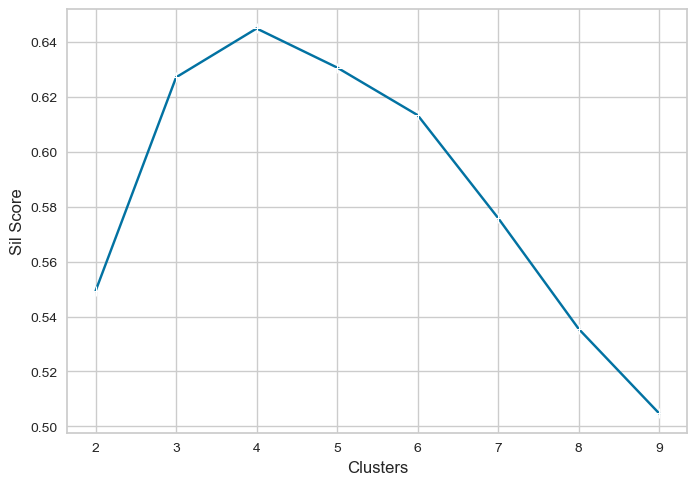

In [1580]:
#Plot silhouette scores and review 
XS_center = pd.DataFrame({'Clusters' : SK, 'Sil Score' : sil_score})
sns.lineplot(x = 'Clusters', y = 'Sil Score', data = XS_center, marker="+")

In [1581]:
#Create new kmeans analysis with chosen optimal clusters and begin analysis
kmeans = KMeans(n_clusters=4, init='k-means++', n_init='auto', max_iter=100, random_state=42)
kmeans.fit(X_scaled)

KMeans(max_iter=100, n_clusters=4, n_init='auto', random_state=42)

In [1582]:
#Double check silhouette score is correct and highest as previously indicated
silhouette_score(X_scaled, kmeans.labels_, metric='euclidean')

0.6448719541517421

<Axes: xlabel='Population', ylabel='Initial_days'>

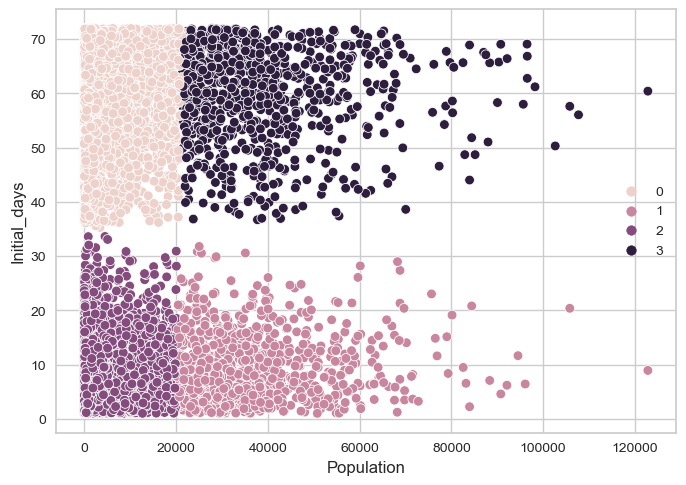

In [1583]:
#Plot data including clusters to visual analysis 
sns.scatterplot(data=df, x='Population', y='Initial_days', hue = kmeans.labels_)

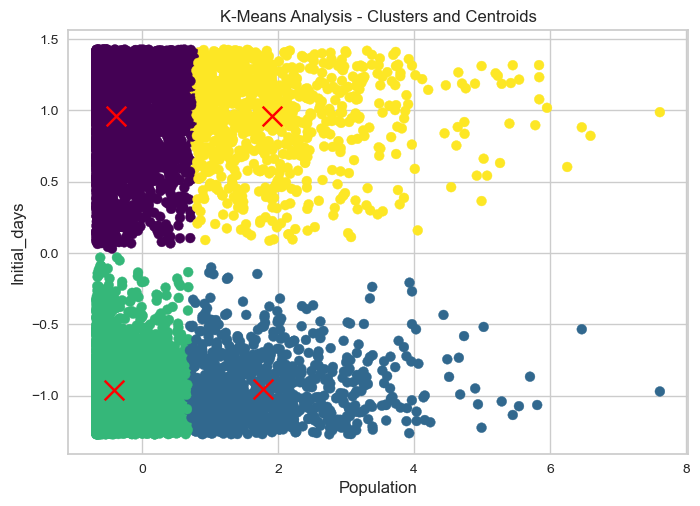

In [1584]:
#plot data WITH clusters and centroids for visual analysis of kmeans -- where do the centroids reside?
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Population')
plt.ylabel('Initial_days')
plt.title('K-Means Analysis - Clusters and Centroids')
plt.show()

In [1585]:
#Review further analysis in quantity by grouping data by clusters -- what is shown?
df.groupby(labels).agg({
    'Population':'mean',
    'Initial_days':'mean'})

,Population,Initial_days
0,4361.126869,59.649172
1,36389.546980,9.416335
2,3941.964425,9.174021
3,38389.286215,59.788714
